# Lab 4 - Evaluation
---
**Summer 2025 - Intructor: Joyce Yang**

**Adapted from teaching materials by Prof. Chris Volinksy Fall 2024.**

- **Fitting Models and Overfitting - Original Notebooks courtesy of Prof. Foster Provost and Rubing Li**


**This notebook focused on data!**

In this notebook, we will walk through
1. Fitting Models and Overfitting
2. Model Assessment

This notebook contains optional task. If you have time, have fun working on optional task. You won't be penalize if you didn't finish optional task.

**Before we begin, remember to save this notebook IN YOUR OWN GOOGLE DRIVE**.  That way you have your own copy to work on, edit and share.

## Fitting models and overfitting


In [1]:
# Import the libraries we will be using
import os
import numpy as np
import pandas as pd
import math
import matplotlib.pylab as plt
import seaborn as sns

%matplotlib inline
sns.set(style='ticks', palette='Set2')

### Data: Predicting wine quality

_"All wines should be tasted; some should only be sipped, but with others, drink the whole bottle."_ - Paulo Coelho, Brida

We will use a data set related to the red variant of the Portuguese "Vinho Verde" wine. We will predict the "sensory" output based on physicochemical inputs.  (Here there is no data about grape types, wine brand, wine selling price, etc.). Our goal is to use machine learning to detect above-average wines (perhaps to send these wines later to professional tasters?).

Let's start by loading the data.

#### Task 1 Load Data
This time, we try to read the data directly from a URL without any download or upload.

Link: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

Hint:
- Use `pd.read_csv` with url.
- Set the delimiter as ";"
- Remember to drop missing value

In [6]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",delimiter=";")
print(df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

#### Task 2 Task Convert

Now, let's turn this into a classification problem -  our goal is to identify above-average wines, not accurately predict the quality score.  We create a binary "is_good" attribute if the quality is greater than the mean (aka `quality >= 6`)

In [7]:
df['is_good'] = (df['quality'] >= 6).astype(int)

# Optional: check how many wines fall into each class
print(df['is_good'].value_counts())

is_good
1    855
0    744
Name: count, dtype: int64


#### Task 3 Data Cleaning

- Remove the original feature `quality`
- Rename the column names by replacing white spaces with underscores

In [8]:
df = df.drop(columns=['quality'])
df.columns = df.columns.str.replace(' ', '_')

#### Task 4 Data Preparation

Create the `X` variable and `Y` variable.And split the dataset into 80/20 train test.
- `X` contains all features
- `Y` contains target
- `random_state = 123`


In [9]:
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop(columns=['is_good'])
y = df['is_good']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=123)

#### [Optional Task] Data Visualization

Let's explore whether any of the features seem to be very predictive by themselves.

- Draw a grid of boxplots that has `target` variable as x-axis and all other features as `y` axis for different boxplots.

Hint:
- `plt,subplots` is good to format the layout
- `plt.tight_layout()` can help you manage the scale
- play with `sns.boxplot`, navigate into parameters, such as `hue` and `ax`
- You may need a `for` loop.

/tmp/ipython-input-14-1196999241.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_good', y=feature, data=df, ax=axes[i], palette='Set2')
/tmp/ipython-input-14-1196999241.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_good', y=feature, data=df, ax=axes[i], palette='Set2')
/tmp/ipython-input-14-1196999241.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_good', y=feature, data=df, ax=axes[i], palette='Set2')
/tmp/ipython-input-14-1196999241.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is depr

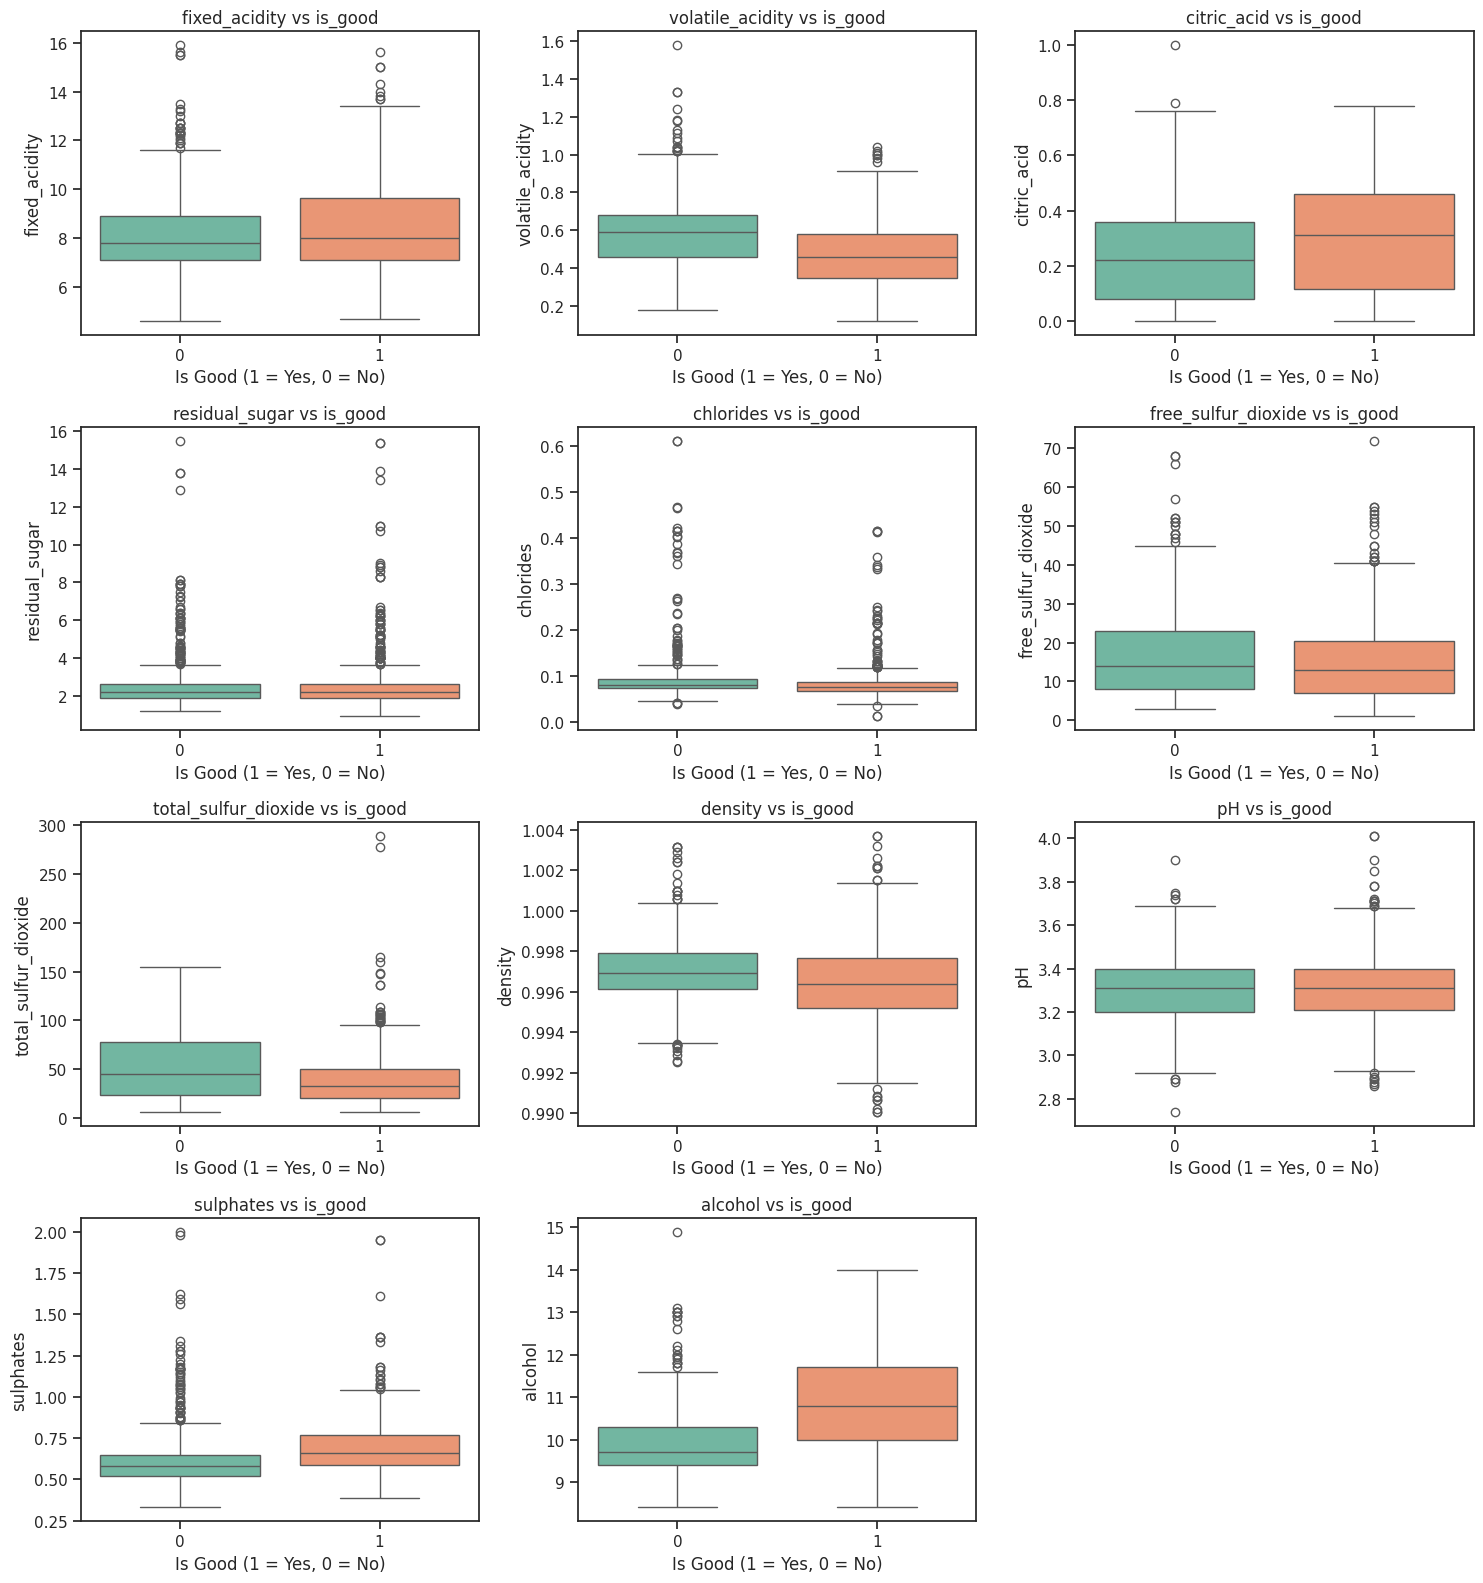

In [14]:
# Get numeric columns excluding the target
features = df.drop(columns='is_good').columns

# Set up subplot grid
n_cols = 3
n_rows = int(np.ceil(len(features) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))

# Flatten axes array for easy indexing
axes = axes.flatten()

# Plot each feature as a boxplot
for i, feature in enumerate(features):
    sns.boxplot(x='is_good', y=feature, data=df, ax=axes[i], palette='Set2')
    axes[i].set_title(f'{feature} vs is_good')
    axes[i].set_xlabel('Is Good (1 = Yes, 0 = No)')
    axes[i].set_ylabel(feature)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### [Optional Task] Data Visualization

Lets pick a few of the features that look important and plot a pairwise scatterplot matrix.

Features selected: `alcohol`,`sulphates`,`total_sulfur_dioxide`, `volatile_acidity`,`is_good`.

Hint:
- Use `sns.pairplot`, please refer to Lab 2 Optional Task Scatter Plot Matrix.
- Add `hue = "is_good"`. Assigning a `hue` variable adds a semantic mapping and changes the default marginal plot to a layered kernel density estimate (KDE).

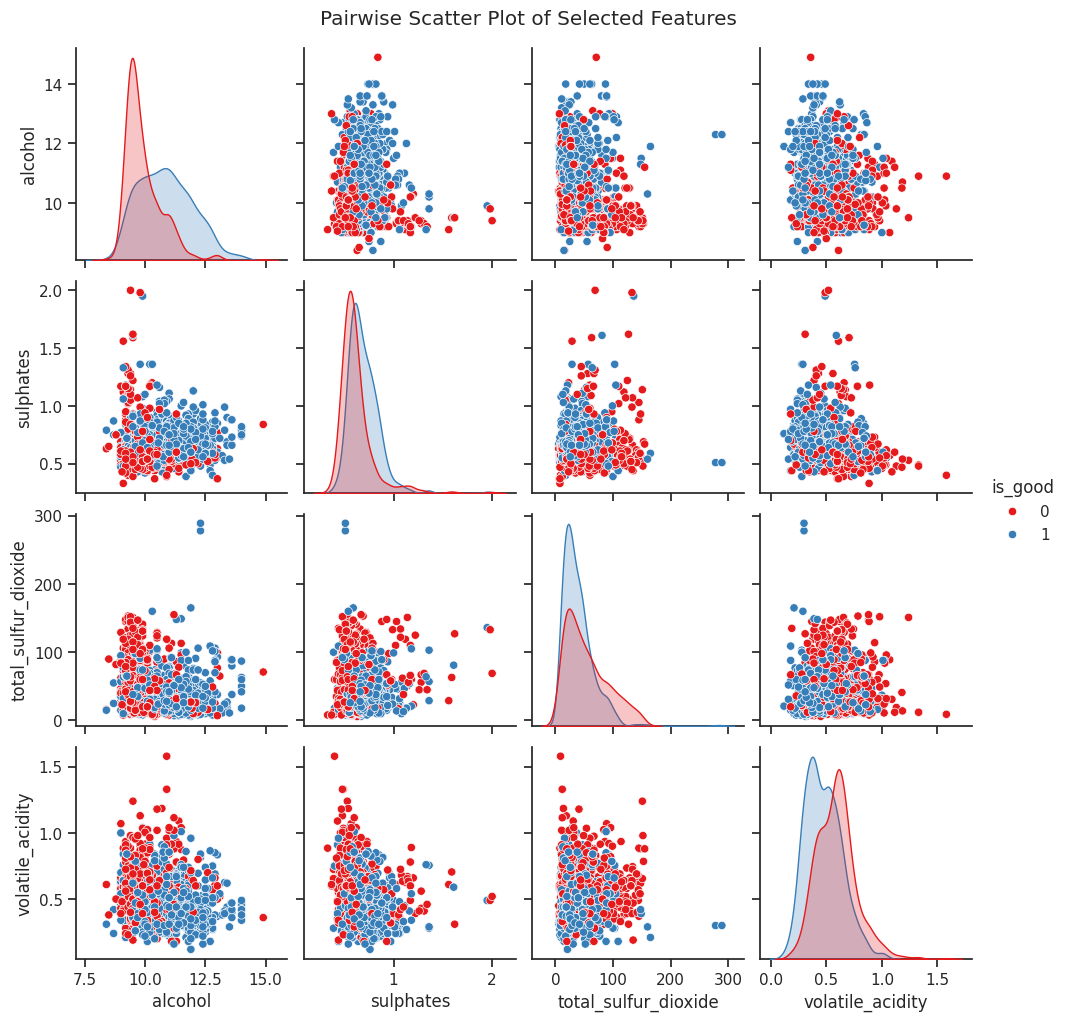

In [15]:
selected_features = ['alcohol', 'sulphates', 'total_sulfur_dioxide', 'volatile_acidity', 'is_good']
sns.pairplot(df[selected_features], hue='is_good', palette='Set1')
plt.suptitle('Pairwise Scatter Plot of Selected Features', y=1.02)
plt.show()

### Fitting a Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, LeaveOneOut, cross_val_score

Let's now fit a model using a tree.  And in particular, classification trees, since our target is to predict (the probability of) whether the wine is good or not -- binary classification (class probability estimation).

#### Task 5 Fit an Easy Tree


Lets fit a simple tree. Then plot the tree to see which feature is the most important.

Hint:
- `criterion` is entropy
- `max_depth` is 4


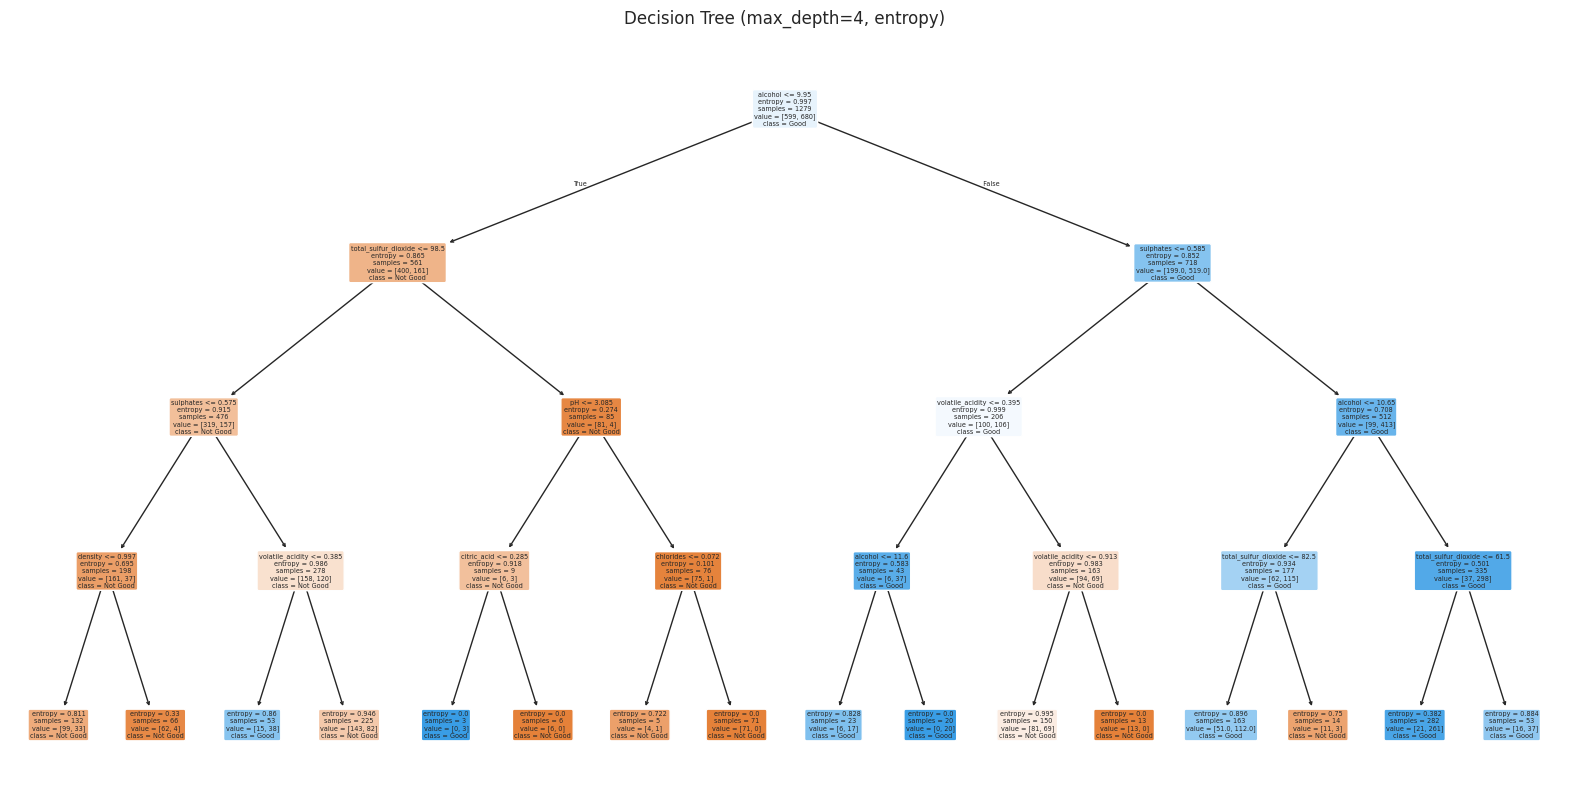

In [13]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=123)

# Fit the model on training data
model.fit(X_train, Y_train)
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['Not Good', 'Good'], filled=True, rounded=True)
plt.title('Decision Tree (max_depth=4, entropy)')
plt.show()

#### Task 6 Evaluate the Tree

Lets compare our accuracy metric applied to our Training Data compared to our Test Data.

What's the training accuracy? What's the testing accuracy? Which do you think will be better?

In [ ]:
#training accuracy = 100%
#Testing accuracy = 0%
# neither are good

#### Task 7 Probability Tree
We can extract probabilities from our test.Plot the histogram of the probabilities

Hint:
- `predict_proba` will give you the probability  

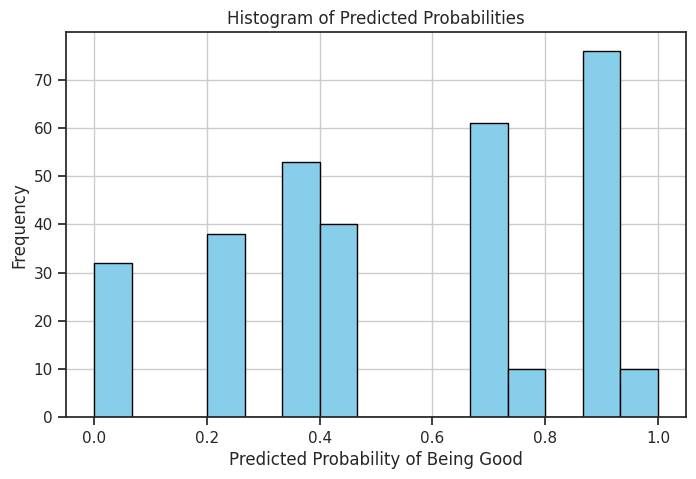

In [16]:
y_proba = model.predict_proba(X_test)[:, 1]  # probability of class "1" (is_good)

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(y_proba, bins=15, color='skyblue', edgecolor='black')
plt.xlabel('Predicted Probability of Being Good')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities')
plt.grid(True)
plt.show()

### Complexity Control using `max_depth`

Now we will use our training/test split to help us determine what is the best depth for the tree.  There are various parameters we can use to prevent overfitting:

- `max_depth` -  how many layers to the tree
- `min_samples_split` - the minimum number of samples needed at a node to split (default =2)
- `min_samples_leaf` - the minimum number of samples that can be in a leaf node
- `max_leaf_nodes` - limits the number of leaf nodes in the overall tree
- `min_impurity_decrease` - restricts the ability of the tree to create trivial splits



#### Task 8 Find Optimal Depth

Let's explore the depth of the tree, using `max-depth`.

Using a for loop, fit trees to your training set of max_depth from [1,3,5,...,29] and report the accuracy on the test set for each.

Draw a plot of Accuracy V.S. Max Depth plot and plot both training accuracy and testing accuracy together

What is YOUR optimal depth? (this might differ based on the `random_state` chosen)

Hint:
- The performance varies with different tree random statement. Therefore, let's fix `random_statement=123`
- You can make a list of max_depth options with `np.arange()`

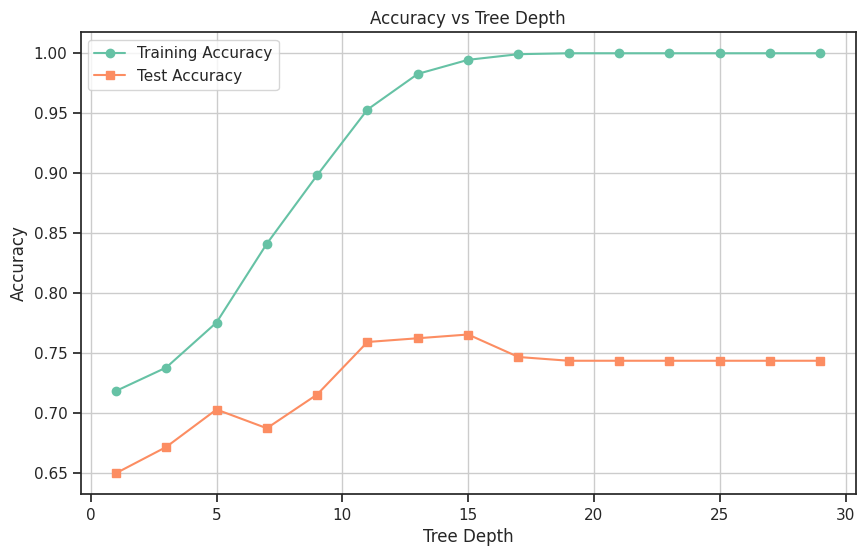

In [19]:
depths = np.arange(1, 30, 2)
train_acc = []
test_acc = []

for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, criterion='entropy', random_state=123)
    clf.fit(X_train, Y_train)

    train_acc.append(clf.score(X_train, Y_train))
    test_acc.append(clf.score(X_test, Y_test))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(depths, train_acc, label='Training Accuracy', marker='o')
plt.plot(depths, test_acc, label='Test Accuracy', marker='s')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Tree Depth')
plt.legend()
plt.grid(True)
plt.show()

### Cross Validation

Above, we made a single train/test split. We set aside 20% of our data and *never* used it for training. We also never used the 80% of the data set aside for training to test generalizability.  Note that there are two potential problems with the simple holdout approach.

1) Perhaps the random split was particularly bad (or good).  Do we have any confidence in our accuracy estimate?

2) We are using only 20% of the data for testing.  Could we possibly use the data more fully for testing?

3) Often we want to know something about the distribution of our evaluation metrics. A simple train/test split only allows a single "point estimate"

Instead of only making the split once, let's use **cross-validation** -- every record will contribute to testing as well as to training.

#### Task 9 Five Fold Cross Validation

With the same possible range of tree depth, let's try to find the best depth for each fold.Plot the average performance of 5 fold for each possible depth.

Hint:
- First, we split the dataset into 5 folds with `KFold` in `sklearn.model_selection`. Set `random_state=123` for reproductivity.
- Next, within a for loop that loop through all possible depth
  - We first initialize the tree model with the depth, and `random_state=123`.
  - cross validation evaluation can be estimated through `cross_val_score` in `sklearn.model_selection` by passing model, dataset and KFold, and set the criteria `scoring="accuracy"` into the function
  - What is the output of `cross_val_score`?
- Plot a line chart with "accuracy" V.S. "Depth" where the accuracy is the average of 5 folds on different depth.

In [20]:
from sklearn.model_selection import cross_val_score, KFold

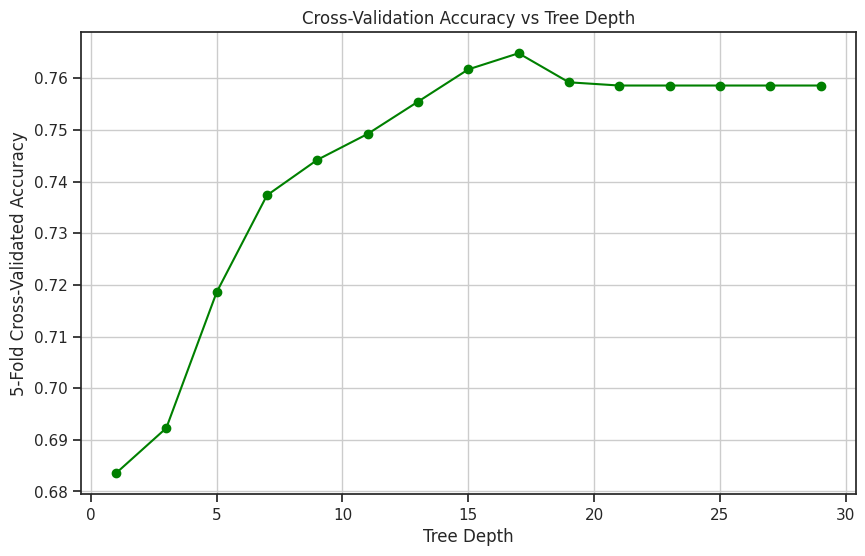

In [21]:
cv = KFold(n_splits=5, shuffle=True, random_state=123)
depths = np.arange(1, 30, 2)
cv_means = []

for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, criterion='entropy', random_state=123)
    scores = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')
    cv_means.append(scores.mean())

# Plot CV accuracy
plt.figure(figsize=(10, 6))
plt.plot(depths, cv_means, marker='o', color='green')
plt.xlabel('Tree Depth')
plt.ylabel('5-Fold Cross-Validated Accuracy')
plt.title('Cross-Validation Accuracy vs Tree Depth')
plt.grid(True)
plt.show()

#### Task 10 Leave One Out Cross-Validation

Can also try Leave One Out Cross-Validation.

This will get a better estimate but will take a lot more time!!!

Lets just do one iteratino since it takes about a minute for each one.

Hint:
- Initialize `LeaveOneOut`
- Initialize `DecisionTreeClassifier` with `depth=10`, `min_samples_split=5`, `criterion="entropy"` and `random_state=123`
- Again use `cross_val_score` to evaluate by passing model, dataset, accuracy as scoring and this time `cv` should be the instance of LeaveOneOut.

What's the mean and std of the LOOC accuracy?

In [23]:
from sklearn.model_selection import LeaveOneOut, cross_val_score

In [22]:
loo = LeaveOneOut()
clf = DecisionTreeClassifier(max_depth=10, min_samples_split=5, criterion='entropy', random_state=123)

# Run LOOCV
loo_scores = cross_val_score(clf, X, y, cv=loo, scoring='accuracy')

# Report
print(f"LOOCV Mean Accuracy: {loo_scores.mean():.4f}")
print(f"LOOCV Std Deviation: {loo_scores.std():.4f}")

LOOCV Mean Accuracy: 0.7498
LOOCV Std Deviation: 0.4331
